# 데이터 증강(Data Augmentation)
---

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비
- cats_and_dogs_filtered dataset

In [1]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
# !unzip cats_and_dogs_filtered.zip

**ImageDataGenerator**
- 기존 버전: `tf.keras.preprocessing.image.ImageDataGenerator`
- 새 버전: `tf.keras.utils.image_dataset_from_directory`

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img = image.load_img('cats_and_dogs_filtered/train/cats/cat.10.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

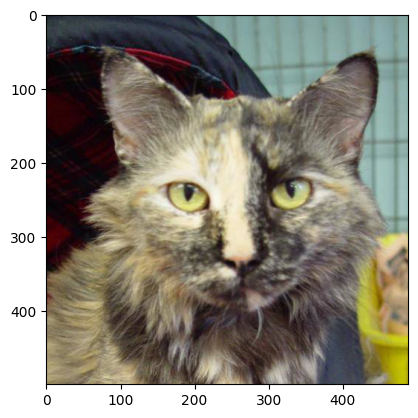

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
x = image.img_to_array(img)

print(x.shape)
print(type(x))
print(x.dtype)

(499, 489, 3)
<class 'numpy.ndarray'>
float32


In [ ]:
# (batch, )
x = x.astype('int').reshape(1, 499, 489, 3)
x.shape

(1, 499, 489, 3)

In [ ]:
gen = ImageDataGenerator(
    rotation_range=90, 
    width_shift_range=0.4, 
    height_shift_range=0.4, 
    vertical_flip=True, 
    horizontal_flip=True
)

In [ ]:
for images in gen.flow(x, batch_size=1):
    print(images.shape)
    break

(1, 499, 489, 3)


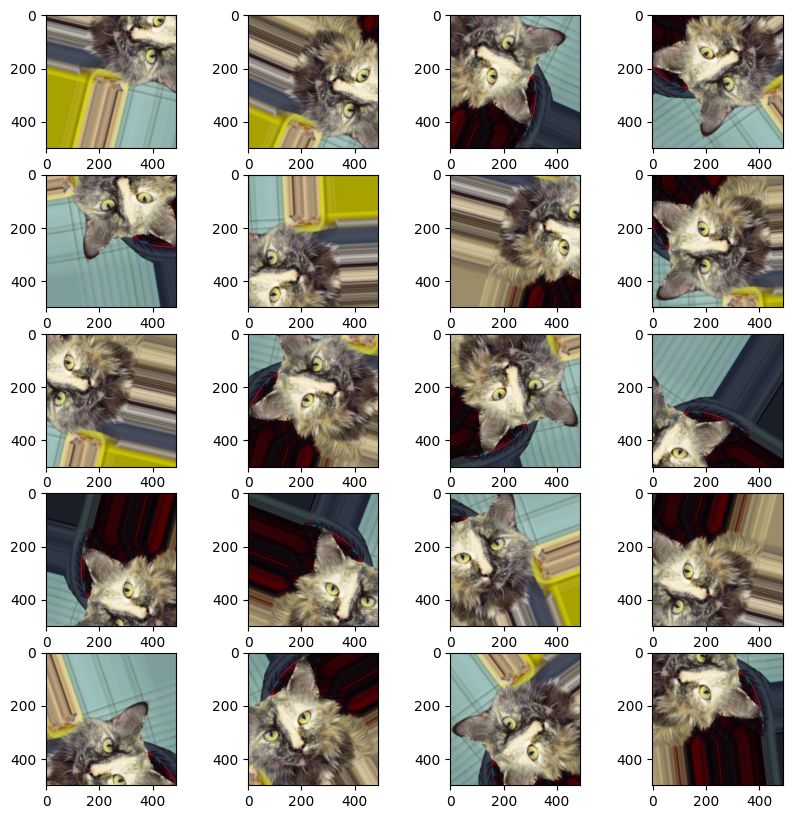

In [ ]:
idx = 0
axs = []

fig = plt.figure(figsize=(10, 10))
for batch in gen.flow(x, batch_size=1):
    axs.append(fig.add_subplot(5, 4, idx+1))
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx = idx + 1
    if idx%20 == 0:
        break
plt.show()

In [ ]:
import os

In [ ]:
data_root = 'cats_and_dogs_filtered'

train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255., # 정규화
    rotation_range=90, 
    width_shift_range=0.4, 
    height_shift_range=0.4, 
    vertical_flip=True, 
    horizontal_flip=True
) # 학습 데이터

val_gen = ImageDataGenerator(rescale=1./255.) # 검증 데이터

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_iter = train_gen.flow_from_directory(
    train_dir, 
    batch_size=BATCH_SIZE, 
    target_size=IMAGE_SIZE, 
    class_mode='binary'
)

type(train_iter)

Found 2000 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [ ]:
val_iter = val_gen.flow_from_directory(
    val_dir, 
    batch_size=BATCH_SIZE, 
    target_size=IMAGE_SIZE, 
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
images, labels = train_iter.next()

len(images), len(labels)

(32, 32)

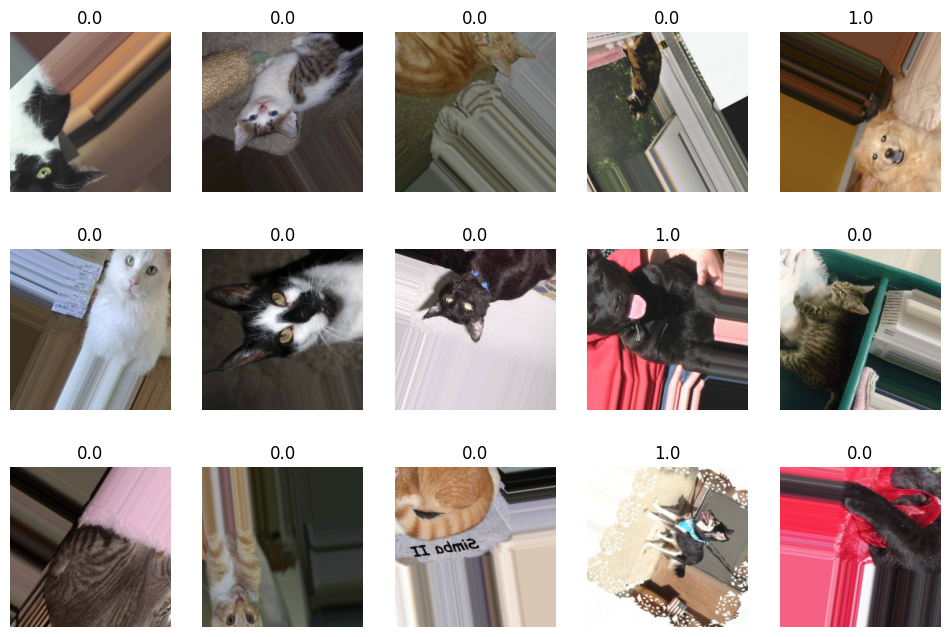

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.imshow(images[i])
    plt.title(labels[i])
plt.show()

### 모델링(Modeling)

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(224, 224, 3)), 
        layers.MaxPool2D(2), 
        layers.Conv2D(64, 3, activation='relu', padding='same'), 
        layers.MaxPool2D(2), 
        layers.Conv2D(128, 3, activation='relu', padding='same'), 
        layers.MaxPool2D(2), 
        layers.Conv2D(128, 3, activation='relu', padding='same'), 
        layers.MaxPool2D(2), 
        layers.Flatten(), 
        layers.Dropout(0.3), 
        layers.Dense(256, activation='relu'), 
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['acc']
    )

    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
EPOCHS = 10

history = model.fit(train_iter, 
                    epochs=EPOCHS, 
                    validation_data=val_iter, 
                    verbose=1)

Epoch 1/10
63/63 [==============================] - 46s 511ms/step - loss: 0.7062 - acc: 0.5240 - val_loss: 0.6930 - val_acc: 0.5060
Epoch 2/10
63/63 [==============================] - 32s 511ms/step - loss: 0.6921 - acc: 0.4965 - val_loss: 0.6920 - val_acc: 0.5100
Epoch 3/10
63/63 [==============================] - 33s 520ms/step - loss: 0.6902 - acc: 0.5110 - val_loss: 0.6634 - val_acc: 0.5790
Epoch 4/10
63/63 [==============================] - 32s 515ms/step - loss: 0.6963 - acc: 0.4940 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
63/63 [==============================] - 32s 513ms/step - loss: 0.6927 - acc: 0.4830 - val_loss: 0.6857 - val_acc: 0.5470
Epoch 6/10
63/63 [==============================] - 33s 518ms/step - loss: 0.6933 - acc: 0.5230 - val_loss: 0.7046 - val_acc: 0.5000
Epoch 7/10
63/63 [==============================] - 33s 528ms/step - loss: 0.6943 - acc: 0.5210 - val_loss: 0.6923 - val_acc: 0.5380
Epoch 8/10
63/63 [==============================] - 31s 496ms/step - 

### 데이터 준비
- 학습 데이터, 검증 데이터, 테스트 데이터

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255., # 정규화
    rotation_range=90, 
    width_shift_range=0.4, 
    height_shift_range=0.4, 
    vertical_flip=True, 
    horizontal_flip=True, 
    validation_split=0.2 # 검증 데이터
) # 학습 데이터

test_gen = ImageDataGenerator(rescale=1./255.) # 테스트 데이터

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_iter = train_gen.flow_from_directory(
    train_dir, 
    batch_size=BATCH_SIZE, 
    target_size=IMAGE_SIZE, 
    class_mode='binary', 
    subset='training'
)

val_iter = train_gen.flow_from_directory(
    train_dir, 
    batch_size=BATCH_SIZE, 
    target_size=IMAGE_SIZE, 
    class_mode='binary', 
    subset='validation'
)

test_iter = test_gen.flow_from_directory(
    val_dir, 
    batch_size=BATCH_SIZE, 
    target_size=IMAGE_SIZE, 
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델링(Modeling)

In [ ]:
def build_model_2():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)), 
        layers.MaxPool2D(2), 
        layers.Conv2D(64, 3, activation='relu'), 
        layers.MaxPool2D(2), 
        layers.Conv2D(128, 3, activation='relu'), 
        layers.MaxPool2D(2), 
        layers.Flatten(), 
        layers.Dropout(0.3), 
        layers.Dense(256, activation='relu'), 
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='rmsprop', #'adam', 
        loss='binary_crossentropy', 
        metrics=['acc']
    )

    return model

In [ ]:
model = build_model_2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

- ModelCheckpoint 콜백 적용

In [ ]:
ckpt_path = './temp/my_best_model.ckpt'

ckpt_call = tf.keras.callbacks.ModelCheckpoint(ckpt_path, 
                                               monitor='val_loss', 
                                               save_best_only=True, 
                                               save_weights_only=True, 
                                               verbose=1)

In [ ]:
EPOCHS = 10

history = model.fit(train_iter, 
                    epochs=EPOCHS, 
                    validation_data=val_iter, 
                    callbacks=[ckpt_call], 
                    verbose=1)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.9482 - acc: 0.5075
Epoch 1: val_loss improved from inf to 0.69300, saving model to ./temp/my_best_model.ckpt
50/50 [==============================] - 33s 595ms/step - loss: 0.9482 - acc: 0.5075 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5181
Epoch 2: val_loss did not improve from 0.69300
50/50 [==============================] - 28s 556ms/step - loss: 0.6929 - acc: 0.5181 - val_loss: 0.6935 - val_acc: 0.5100
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.6938 - acc: 0.5131
Epoch 3: val_loss improved from 0.69300 to 0.69128, saving model to ./temp/my_best_model.ckpt
50/50 [==============================] - 32s 644ms/step - loss: 0.6938 - acc: 0.5131 - val_loss: 0.6913 - val_acc: 0.5275
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.6889 - acc: 0.5269
Epoch 4: val_loss improved from 0.69128 to 0.67

In [ ]:
model.load_weights(ckpt_path)

In [ ]:
model.evaluate(test_iter)

32/32 [==============================] - 4s 119ms/step - loss: 0.6221 - acc: 0.6390


[0.6221069097518921, 0.6389999985694885]